<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_88/blob/main/Eq88_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*

### **Semana 4 PCA**


####**Curso: Ciencia y analítica de datos (Gpo 10)**
####**Prof. Jobish Vallikavungal**
####**9 de octubre de 2022**

Equipo: 88

Nombre del estudiante: 


***Dalina Aidee Villa Ocelotl (A01793258)***


***Miguel Guillermo Galindo Orozco (A01793695)***


### Reducción de Dimensionalidad con PCA

**Importar librerías**

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

**Lectura de la data a utilizar**

Del ejercicio anterior **Limpieza de una base de Datos** *Semana 3 Actividad 1* se obtuvo una base limpia sobre las tarjetas de crédito. 

Dicha base se subió al repositorio, y será la que se usará en el presente ejercicio.

In [2]:
path='https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_88/main/Eq88_Clean_credit_card_clients.csv'
df = pd.read_csv(path).iloc[:, 1:] ### Seleccionamos todo menos la primer columna, al ser el índice de la escritura anterior

In [3]:
df.head(3)

,ID,CreditAmount,Gender,Education,MaritalStatus,Age,Status_Sep,Status_Ago,Status_Jul,Status_Jun,...,Saldo_Jun,Saldo_May,Saldo_Abr,Pagos_Sep,Pagos_Ago,Pagos_Jul,Pagos_Jun,Pagos_May,Pagos_Abr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0




---



---


**Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

  Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.



---




---



Para responder a la pregunta anterior, realizamos el cálculo de componentes principales vía la librería de Sklearn.decomposition.PCA

Al ser un análisis númerico, cuya intención es capturar la mayor cantidad de información (proporción de varianza) con las menores variables posibles, se decidió quitar las siguientes variables: 

* 'ID' - Identificador del individuo
  
* 'Y' (flag del comportamiento a predecir)
  
* Variables categóricas ('Gender','Education','MaritalStatus', 'Status_Sep', 'Status_Ago', 'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Abr')

In [4]:
## Sólo variables numéricas
n_df = df.drop(columns=['ID','Y','Gender','Education','MaritalStatus', 'Status_Sep', 'Status_Ago', 'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Abr'])

In [5]:
n_df.head()

,CreditAmount,Age,Saldo_Sep,Saldo_Ago,Saldo_Jul,Saldo_Jun,Saldo_May,Saldo_Abr,Pagos_Sep,Pagos_Ago,Pagos_Jul,Pagos_Jun,Pagos_May,Pagos_Abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [6]:
n_df.shape

(29997, 14)

**Normalize before applying PCA!!!**

In [7]:
from sklearn import preprocessing

In [8]:
sc_n_df = preprocessing.scale(n_df.dropna(axis=0)) ## Estandarizamos las variables para tenerlos en las mismas unidades, y centramos en la media
sc_n_df = pd.DataFrame(sc_n_df, columns = n_df.columns)

In [9]:
columnas_n_df = sc_n_df.columns # esta lista de columans la utilizaremos más adelante para mostrar los resultados

In [17]:
sc_n_df.head()

,CreditAmount,Age,Saldo_Sep,Saldo_Ago,Saldo_Jul,Saldo_Jun,Saldo_May,Saldo_Abr,Pagos_Sep,Pagos_Ago,Pagos_Jul,Pagos_Jun,Pagos_May,Pagos_Abr
0,-1.136801,-1.245918,-0.643108,-0.648025,-0.668796,-0.673509,-0.664057,-0.655144,-0.341863,-0.227088,-0.296755,-0.308059,-0.314121,-0.293399
1,-0.366068,-1.028932,-0.659832,-0.667378,-0.640045,-0.622619,-0.607199,-0.600288,-0.341863,-0.213591,-0.239959,-0.244229,-0.314121,-0.180901
2,-0.597288,-0.160989,-0.299043,-0.494479,-0.483133,-0.450616,-0.418065,-0.393581,-0.250211,-0.191891,-0.239959,-0.244229,-0.248670,-0.012153
3,-0.905581,0.164490,-0.057888,-0.013730,0.032338,-0.233136,-0.187493,-0.158108,-0.221109,-0.169366,-0.228600,-0.237846,-0.244154,-0.237150
4,-0.905581,2.334348,-0.579202,-0.611933,-0.161779,-0.347825,-0.348980,-0.333325,-0.221109,1.334956,0.271208,0.266414,-0.269025,-0.255206


**Realizamos Análisis PCA**

In [18]:
pcanalisis = PCA(n_components=13) ## Son 13 componentes al ser sólo 14 variables, el máximo número de componentes principales posibles que reduzcan la dimensionalidad sería 13.

Se decidió calcular todos los componentes principales para después realizar el análisis y sólo quedarnos con los adecuados

In [19]:
pcanalisis.fit(sc_n_df) ## Ajuste del PCA con información numérica disponible

PCA(n_components=13)

**Resumen de resultados**

In [20]:
pca_resumen = pd.DataFrame({'Desviación_Estándar': np.sqrt(pcanalisis.explained_variance_), 
                          'Prop_Varianza_explicada': pcanalisis.explained_variance_ratio_,
                          'Acum_Prop_Varianza_explicada': np.cumsum(pcanalisis.explained_variance_ratio_)
                          })
pca_resumen = pca_resumen.transpose()
pca_resumen.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
pca_resumen.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Desviación_Estándar,2.43,1.31,1.02,0.96,0.94,0.93,0.88,0.85,0.84,0.51,0.27,0.2,0.16
Prop_Varianza_explicada,0.42,0.12,0.07,0.07,0.06,0.06,0.06,0.05,0.05,0.02,0.01,0.0,0.00
Acum_Prop_Varianza_explicada,0.42,0.55,0.62,0.69,0.75,0.81,0.87,0.92,0.97,0.99,0.99,1.0,1.00


Observamos gráficamente la proporción de información capturada en el PCA (utilizando Scree Plot)

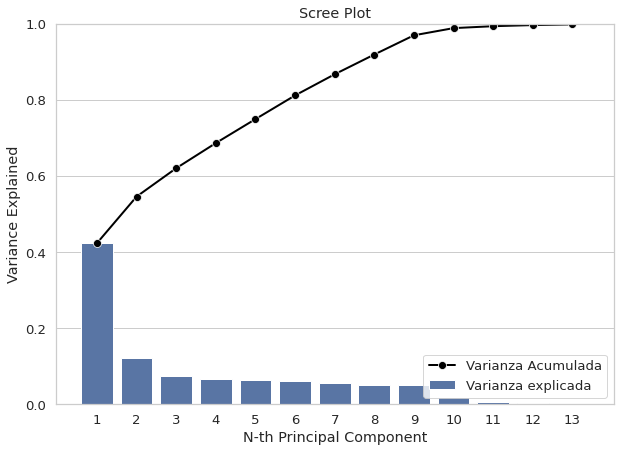

In [21]:
## Se utilizó las siguientes líneas de código aprendidas y replicadas en clase

PC_components = np.arange(pcanalisis.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcanalisis.explained_variance_ratio_, 
                color = 'b',
                label='Varianza explicada',
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcanalisis.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8, 
                 label = 'Varianza Acumulada'
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.legend(loc='lower right')
plt.ylim(0, 1)

plt.show()

**Respuesta Paso 1:**

Con los resultados anteriores, de la tabla (PCA_resumen) y la gráfica (Scree Plot), concluimos que es pertinente utilizar los primeros 7 Componentes Principales, ya que con esto capturamos el 87% de la varianza del total de variables numéricas. 

En otras palabras, transoformando las variables a estos compomentes (PC1, PC2, PC3, PC4, PC5, PC6, PC7) y sólo utilizando esta información, reducimos de 14 a 7 variables (50% de las numéricas), capturando el 87% de la información. 

No utilizamos más componentes porque cada componente extra aporta a más 5% extra de información, aumentando la dimensionalidad por lo que no es un lift significativo en la información a utilizar.



---

**Paso 2:** Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.



---





In [25]:
pcaComponentes_df = pd.DataFrame(pcanalisis.components_.round(4).transpose(), 
                                columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'],
                                index= columnas_n_df
                                )
pcaComponentes_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
CreditAmount,0.1655,0.3008,-0.3786,-0.1998,-0.0303,-0.0810,0.1111,-0.0547,-0.8216,-0.0295,-0.0063,0.0156,-0.0007
Age,0.0327,0.0720,-0.8700,0.3370,0.0340,0.0731,-0.0784,0.0311,0.3311,-0.0090,0.0003,-0.0013,0.0002
Saldo_Sep,0.3724,-0.1910,-0.0334,-0.0613,-0.0386,-0.0448,0.0073,0.0060,0.0089,0.5667,0.4171,-0.4331,-0.1878
Saldo_Ago,0.3831,-0.1752,-0.0016,0.0089,-0.0807,-0.0323,-0.0322,-0.1343,0.0170,0.3869,0.0383,0.3475,0.3374
Saldo_Jul,0.3881,-0.1274,0.0347,0.0618,-0.1190,0.0920,-0.1184,0.0930,-0.0198,0.1228,-0.4858,0.4942,-0.0956
Saldo_Jun,0.3915,-0.1204,0.0339,0.0744,-0.0254,0.0109,0.1244,0.0398,0.0188,-0.2041,-0.5252,-0.4942,-0.3501
Saldo_May,0.3883,-0.1065,0.0334,0.0383,0.1139,-0.0904,-0.0075,0.0497,0.0232,-0.4203,0.0736,-0.2441,0.7161
Saldo_Abr,0.3809,-0.0936,0.0177,-0.0738,0.1545,0.0766,0.0083,0.0023,0.0607,-0.4897,0.5100,0.3370,-0.4324
Pagos_Sep,0.1353,0.3830,0.1730,0.3619,-0.2300,0.0253,-0.2018,-0.7483,0.0285,-0.0601,0.0461,-0.0676,-0.0455
Pagos_Ago,0.1169,0.4084,0.2003,0.3468,-0.1759,0.3975,-0.2781,0.5777,-0.1161,0.0494,0.1473,-0.0686,0.0398


**PC 1**

In [40]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 1:')
print('\n')
print(pcaComponentes_df.PC1.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 1:')
print('\n')
print(pcaComponentes_df.PC1.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 1:


Saldo_Jun    0.3915
Saldo_May    0.3883
Saldo_Jul    0.3881
Saldo_Ago    0.3831
Saldo_Abr    0.3809
Name: PC1, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 1:


Age          0.0327
Pagos_Abr    0.1060
Pagos_May    0.1139
Pagos_Ago    0.1169
Pagos_Jun    0.1172
Name: PC1, dtype: float64


INTERPRETACIÓN

**PC 2**

In [41]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 2:')
print('\n')
print(pcaComponentes_df.PC2.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 2:')
print('\n')
print(pcaComponentes_df.PC2.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 2:


Pagos_Ago    0.4084
Pagos_Jul    0.3924
Pagos_Sep    0.3830
Pagos_Jun    0.3493
Pagos_Abr    0.3230
Name: PC2, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 2:


Saldo_Sep   -0.1910
Saldo_Ago   -0.1752
Saldo_Jul   -0.1274
Saldo_Jun   -0.1204
Saldo_May   -0.1065
Name: PC2, dtype: float64


Interpretación

**PC 3**

In [42]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 3:')
print('\n')
print(pcaComponentes_df.PC3.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 3:')
print('\n')
print(pcaComponentes_df.PC3.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 3:


Pagos_Ago    0.2003
Pagos_Sep    0.1730
Pagos_Jul    0.1219
Pagos_Jun    0.0625
Saldo_Jul    0.0347
Name: PC3, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 3:


Age            -0.8700
CreditAmount   -0.3786
Pagos_May      -0.0602
Pagos_Abr      -0.0493
Saldo_Sep      -0.0334
Name: PC3, dtype: float64


INTERPRETACIÓN

**PC 4**

In [43]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 4:')
print('\n')
print(pcaComponentes_df.PC4.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 4:')
print('\n')
print(pcaComponentes_df.PC4.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 4:


Pagos_Sep    0.3619
Pagos_Ago    0.3468
Age          0.3370
Pagos_Jul    0.2448
Saldo_Jun    0.0744
Name: PC4, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 4:


Pagos_May      -0.6100
Pagos_Abr      -0.3667
CreditAmount   -0.1998
Pagos_Jun      -0.0934
Saldo_Abr      -0.0738
Name: PC4, dtype: float64


INTERPRETACIÓN

**PC 5**

In [44]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 5:')
print('\n')
print(pcaComponentes_df.PC5.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 5:')
print('\n')
print(pcaComponentes_df.PC5.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 5:


Pagos_Jun    0.6107
Pagos_Jul    0.2475
Saldo_Abr    0.1545
Pagos_May    0.1526
Saldo_May    0.1139
Name: PC5, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 5:


Pagos_Abr   -0.6299
Pagos_Sep   -0.2300
Pagos_Ago   -0.1759
Saldo_Jul   -0.1190
Saldo_Ago   -0.0807
Name: PC5, dtype: float64


INTERPRETACIÓN

**PC 6**

In [45]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 6:')
print('\n')
print(pcaComponentes_df.PC6.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 6:')
print('\n')
print(pcaComponentes_df.PC6.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 6:


Pagos_May    0.6143
Pagos_Ago    0.3975
Saldo_Jul    0.0920
Saldo_Abr    0.0766
Age          0.0731
Name: PC6, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 6:


Pagos_Jun      -0.4601
Pagos_Abr      -0.4542
Pagos_Jul      -0.0918
Saldo_May      -0.0904
CreditAmount   -0.0810
Name: PC6, dtype: float64


INTERPRETACIÓN

**PC 7**

In [46]:
print('Variables MÁS importantes, y su coeficiente para el componente Principal 7:')
print('\n')
print(pcaComponentes_df.PC7.nlargest())
print('\n')
print('Variables MENOS importantes, y su coeficiente para el componente Principal 7:')
print('\n')
print(pcaComponentes_df.PC7.nsmallest())

Variables MÁS importantes, y su coeficiente para el componente Principal 7:


Pagos_Jul       0.7854
Saldo_Jun       0.1244
CreditAmount    0.1111
Pagos_Abr       0.0259
Pagos_May       0.0137
Name: PC7, dtype: float64


Variables MENOS importantes, y su coeficiente para el componente Principal 7:


Pagos_Jun   -0.4637
Pagos_Ago   -0.2781
Pagos_Sep   -0.2018
Saldo_Jul   -0.1184
Age         -0.0784
Name: PC7, dtype: float64


INTERPRETACIÓN



---

**Paso 3:** Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.



---




Variables númericas

In [51]:
n_df.columns

Index(['CreditAmount', 'Age', 'Saldo_Sep', 'Saldo_Ago', 'Saldo_Jul',
       'Saldo_Jun', 'Saldo_May', 'Saldo_Abr', 'Pagos_Sep', 'Pagos_Ago',
       'Pagos_Jul', 'Pagos_Jun', 'Pagos_May', 'Pagos_Abr'],
      dtype='object')

In [54]:
n_df.describe()

,CreditAmount,Age,Saldo_Sep,Saldo_Ago,Saldo_Jul,Saldo_Jun,Saldo_May,Saldo_Abr,Pagos_Sep,Pagos_Ago,Pagos_Jul,Pagos_Jun,Pagos_May,Pagos_Abr
count,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.000000,29997.000000,29997.000000,29997.000000
mean,167496.072274,35.483862,51250.999800,49209.886155,4.704938e+04,43303.548438,40352.231673,38945.976798,5662.151115,5.921469e+03,5224.901523,4826.217938,4799.347400,5216.048513
std,129748.803871,9.217346,73609.343305,71152.563951,6.932027e+04,64296.498754,60767.258758,59447.446112,16562.904915,2.304199e+04,17607.049441,15666.798592,15278.923787,17778.274793
min,10000.000000,21.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3566.000000,2986.000000,2.671000e+03,2332.000000,1768.000000,1257.000000,1000.000000,8.330000e+02,390.000000,296.000000,253.000000,118.000000
50%,140000.000000,34.000000,22383.000000,21200.000000,2.009000e+04,19056.000000,18118.500000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67094.000000,64013.000000,6.016700e+04,54515.000000,50185.000000,49205.000000,5006.000000,5.000000e+03,4505.000000,4013.000000,4031.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [63]:
columnas_n_df[0]

'CreditAmount'

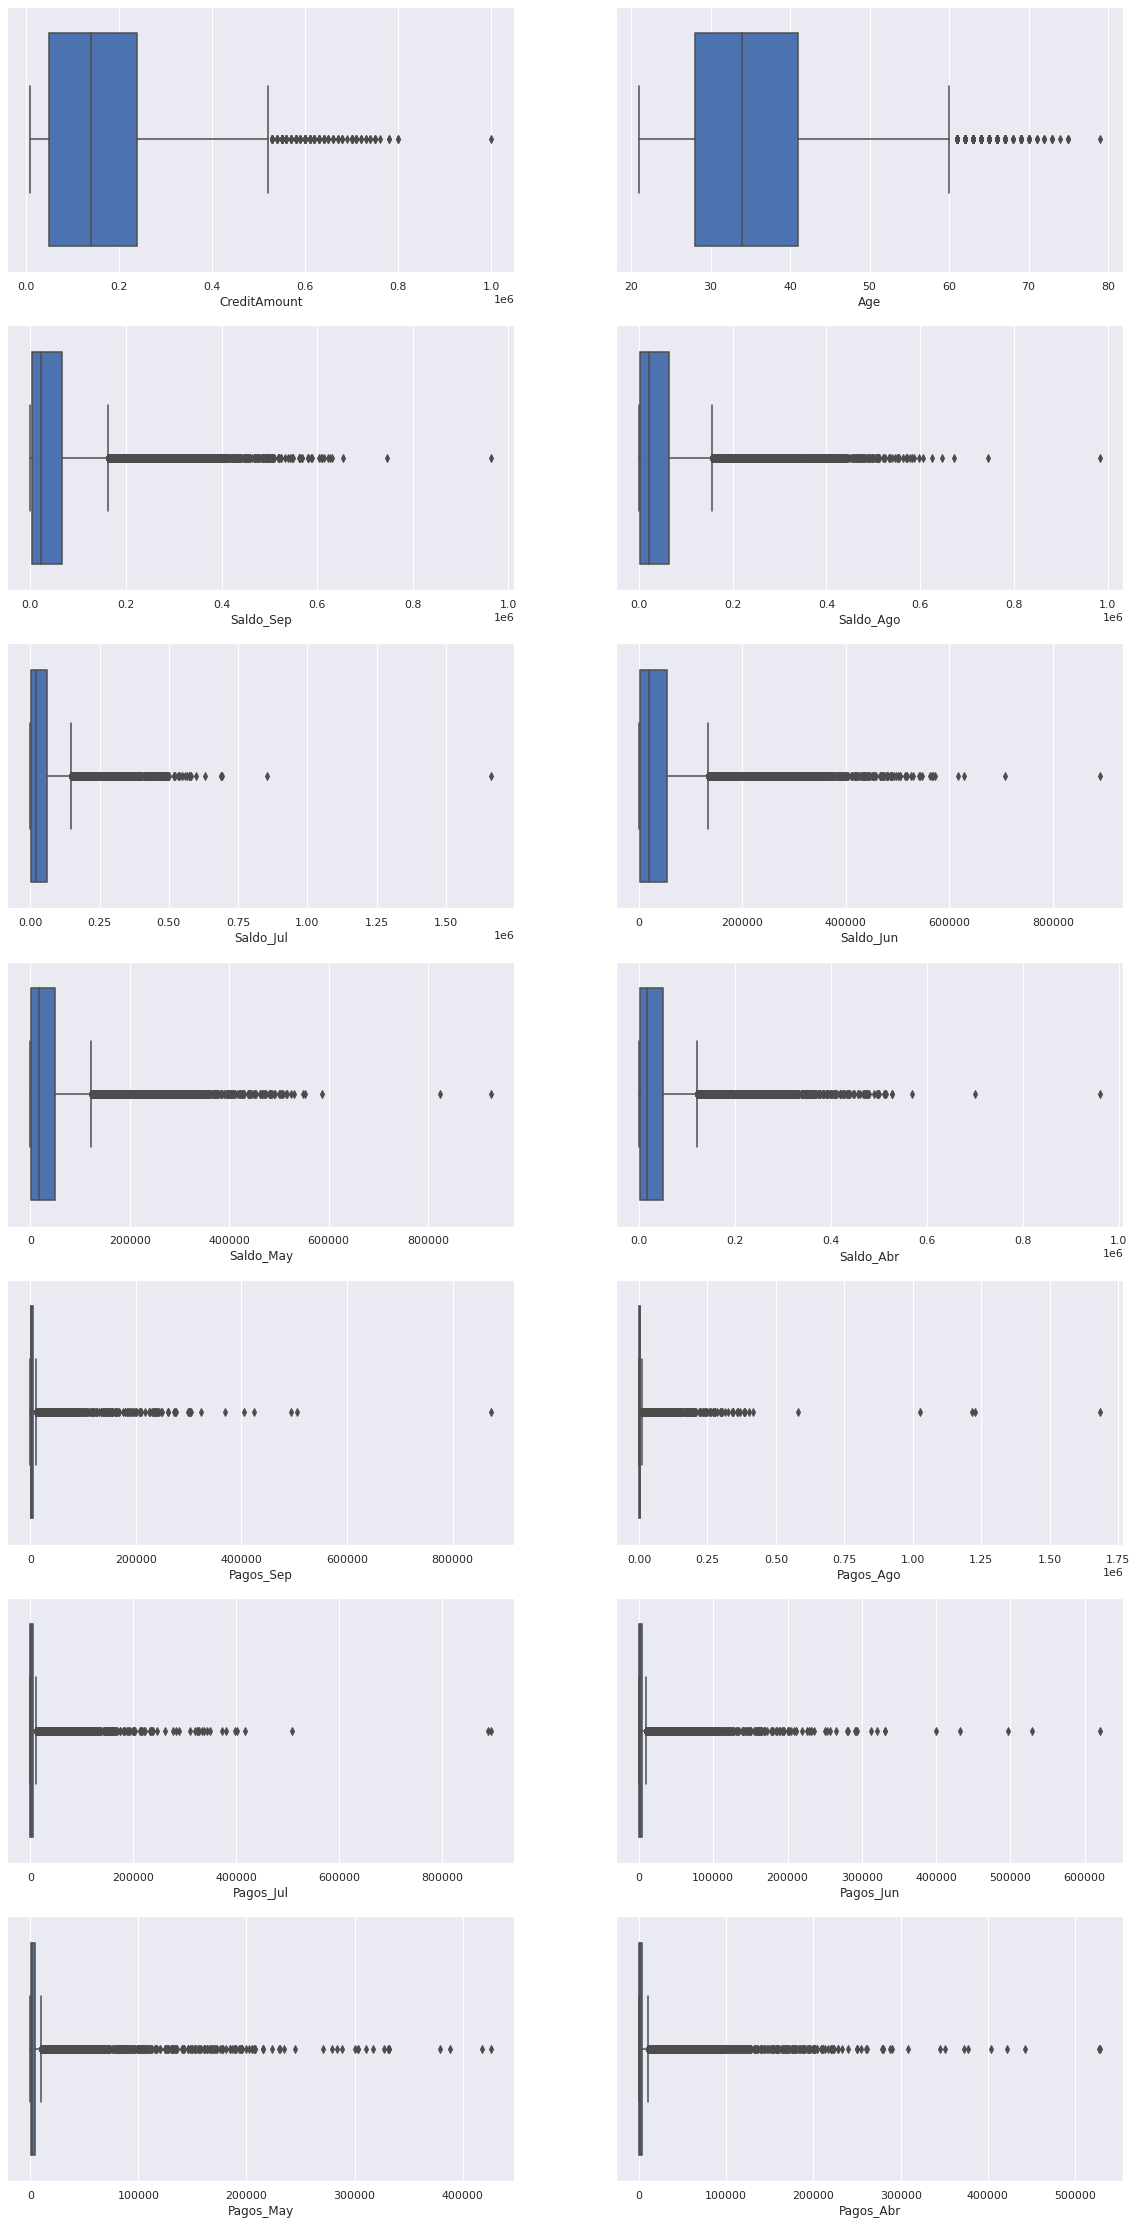

In [75]:
sns.set(rc={'figure.figsize':(20,40)})
fig, axes = plt.subplots(7,2 )    
  
for k in range(0,14):
  plt.subplot(7,2,k+1) 
  sns.boxplot(data=n_df, x=columnas_n_df[k], saturation=1)
  plt.xlabel(columnas_n_df[k])  

plt.show()


INTERPRETACIÓN DEL DESCRIBE Y DEL BOXPLOT

CreditAmount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


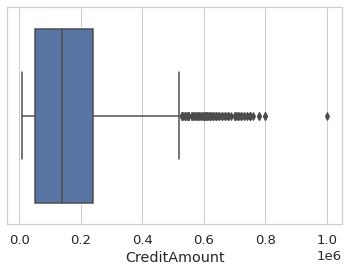

In [53]:
sns.boxplot(n_df.CreditAmount)
plt.show()

Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


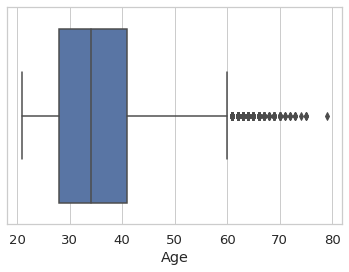

In [55]:
sns.boxplot(n_df.Age)
plt.show()

Saldo_Sep

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


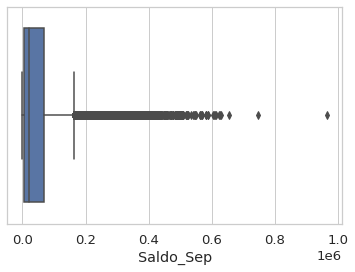

In [56]:
sns.boxplot(n_df.Saldo_Sep)
plt.show()

Saldo_Ago

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


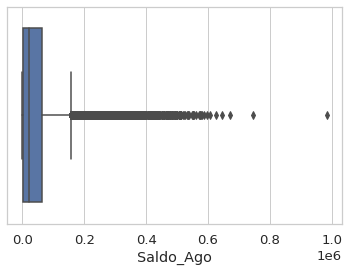

In [57]:
sns.boxplot(n_df.Saldo_Ago)
plt.show()

Saldo_Jul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


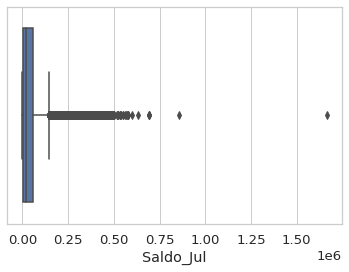

In [58]:
sns.boxplot(n_df.Saldo_Jul)
plt.show()

Saldo_Jun

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


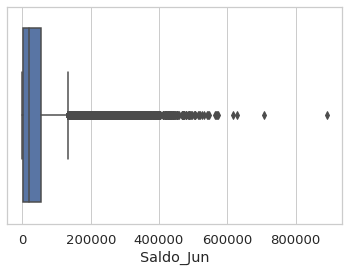

In [59]:
sns.boxplot(n_df.Saldo_Jun)
plt.show()

Saldo_May

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


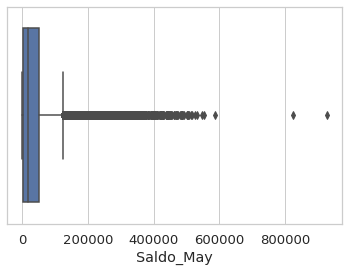

In [60]:
sns.boxplot(n_df.Saldo_May)
plt.show()

Saldo_Abr

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


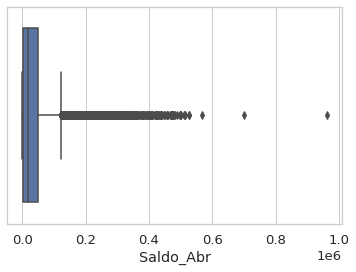

In [61]:
sns.boxplot(n_df.Saldo_Abr)
plt.show()

Pagos_Sep

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


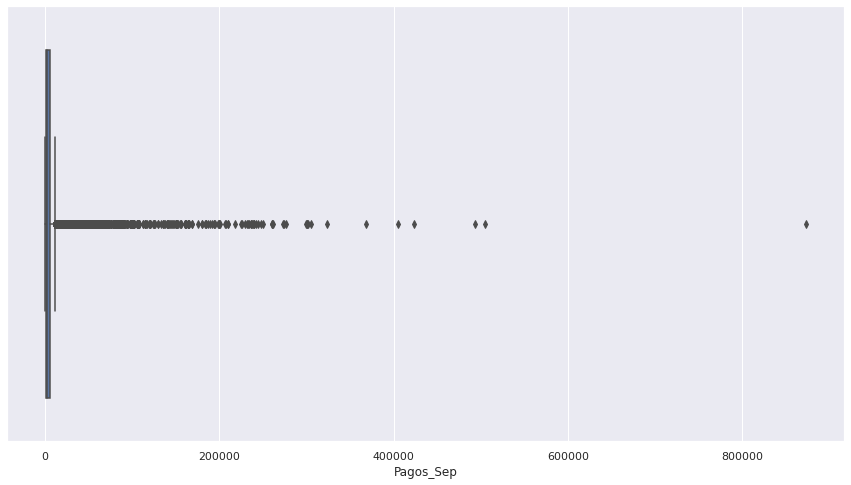

In [68]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(n_df.Pagos_Sep)
plt.show()

**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

¿Cuál es el número de componentes mínimo y por qué?

¿Cuál es la variación de los datos que representan esos componentes? 

¿Cuál es la pérdida de información después de realizar PCA?

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

-- FIN DE LA ACTIVIDAD __